# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # ignorar warnings

# pa pintar
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(8, 6)  # tamaño por defecto, decenas de pixeles

import seaborn as sns  # esta basada en matplotlib

# plotar inline en jupyter
%matplotlib inline 

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [8]:
employee = pd.read_csv('Employee.csv')

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [25]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [37]:
employee.groupby("Department").mean("Salary")

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [90]:
employee.pivot_table(index=["Department"],values=["Salary"], aggfunc="mean")

Years                    
Salary        30   35   55   60   70
Department                          
HR           2.0  4.0  NaN  NaN  8.0
IT           2.0  1.0  NaN  7.0  8.0
Sales        NaN  NaN  2.5  NaN  NaN

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [95]:
employee.pivot_table(index=["Department"],columns=["Title"], values=["Salary"], aggfunc="mean")

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [97]:
employee.pivot_table(index=["Title"],columns=["Years"], values=["Salary"], aggfunc="mean")

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [98]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [101]:
employee.pivot_table(columns=["Title"], index=["Department"], values=["Salary", "Name"], aggfunc=["mean", "count"])

mean                   count                                   \
           Salary                    Name                   Salary           
Title          VP analyst associate    VP analyst associate     VP analyst   
Department                                                                   
HR           70.0    32.5       NaN   1.0     2.0       NaN    1.0     2.0   
IT           70.0    32.5      60.0   1.0     2.0       1.0    1.0     2.0   
Sales         NaN     NaN      55.0   NaN     NaN       2.0    NaN     NaN   

                      
                      
Title      associate  
Department            
HR               NaN  
IT               1.0  
Sales            2.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [137]:
#display(employee.groupby("Department")["Salary"].describe()[["50%", "min", "max", "std"]])


display(employee.pivot_table(index=["Department", "Title"], values="Salary", aggfunc={"Salary": ["median", "min", "max", "std"]}))

        
        

print('''
* There are NA's
* Sales has no standard deviation, I suspect there is only one person in sales department.
* HR salaries have more variance despite having the same minimum and maximum
''')

max  median   min       std
Department Title                                  
HR         VP         70.0    70.0  70.0       NaN
           analyst    35.0    32.5  30.0  3.535534
IT         VP         70.0    70.0  70.0       NaN
           analyst    35.0    32.5  30.0  3.535534
           associate  60.0    60.0  60.0       NaN
Sales      associate  55.0    55.0  55.0  0.000000


* Sales has no standard deviation, I suspect there is only one person in sales department.
* HR salaries have more variance despite having the same minimum and maximum



#### Based on your comments, fill the missing values with an appropriate value

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [121]:
employee.pivot_table(index=["Department"], values=["Name", "Salary"], aggfunc=["count", "sum"])

count           sum
            Name Salary Salary
Department                    
HR             3      3    135
IT             4      4    195
Sales          2      2    110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [125]:
#employee.pivot_table(aggfunc=["sum", "mean"], values=["Years", "Salary"],  index=["Department", "Title"])

employee.pivot_table(values={"Years": "sum", "Salary": "mean"},  index=["Department", "Title"])


Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
# your answer here

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [140]:
fitbit=pd.read_csv("Fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [142]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [160]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [143]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [156]:
import scipy.stats as st

st.pearsonr(fitbit["Minutes Very Active"], fitbit["Steps"])

(0.5714518481062606, 3.3572824994538076e-33)

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

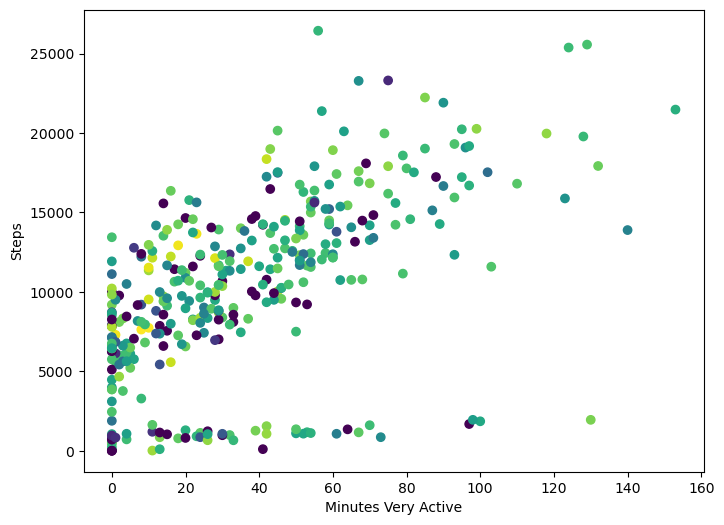

In [172]:
df=fitbit
plt.scatter(x=df["Minutes Very Active"], y=df["Steps"], c=df["Distance"])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps");

#### What can you say about Minute Very Active and Steps? Write a comment below

In [173]:
print('''There is a cluster of data that does not follow any correlation.
These data points have a invariable step count but an increasing value of minutes very active.

I plotted the rest of variables as dot color to investigate any potential reason for that behaviour
but unluckily I see no patterns.

I would take out the data point < 5000 steps and recalculate the correlation.

''')
      

There is a cluster of data that does not follow any correlation.
These data points have a invariable step count but an increasing value of minutes very active.

I plotted the rest of variables as dot color to investigate any potential reason for that behaviour
but unluckily I see no patterns.

I would take out the data point < 5000 steps and recalculate the correlation.




#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [174]:
st.pearsonr(fitbit["Minutes Sedentary"], fitbit["Steps"])

(0.07690608062990091, 0.14143690593737201)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

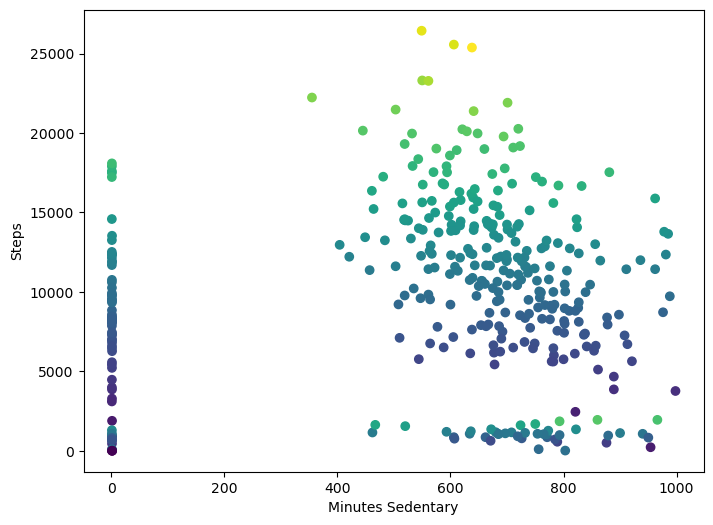

In [190]:
plt.scatter(x=df["Minutes Sedentary"], y=df["Steps"], c=df["Distance"])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps");

In [184]:
print('''There is a cluster of data that does not follow any correlation.

In this case, these data points have 0 minutes sendentary, what could possibly indicate an error of the Fitbit recording system.

I plotted the rest of variables as dot color to investigate any potential reason for that behaviour
but unluckily I see no patterns.

I would take out these data points and recalculate the correlation.

Besides, there is still a subcluster of point with invariant step count that should be filtered out aswell.

''')
      

There is a cluster of data that does not follow any correlation.

In this case, these data points have 0 minutes sendentary, what could possibly indicate an error of the Fitbit recording system.

I plotted the rest of variables as dot color to investigate any potential reason for that behaviour
but unluckily I see no patterns.

I would take out these data points and recalculate the correlation.

Besides, there is still a subcluster of point with invariant step count that should be filtered out aswell.




#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [188]:
st.pearsonr(fitbit["MinutesOfSleep"], fitbit["Steps"])

(0.13098565950836383, 0.012018728392520099)

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

I see the same patterns as described above


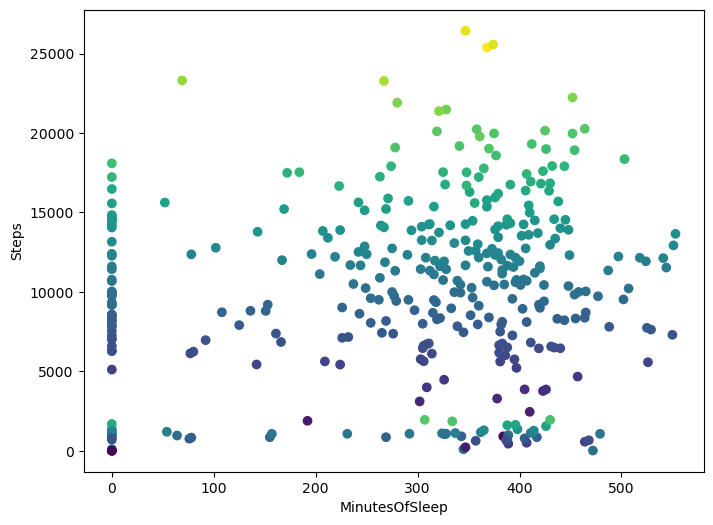

In [192]:
plt.scatter(x=df["MinutesOfSleep"], y=df["Steps"], c=df["Distance"])
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps");


print("I see the same patterns as described above")

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [203]:
cor_fit=df[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calorie burned       367 non-null    int64  
 1   Steps                367 non-null    int64  
 2   Floors               367 non-null    int64  
 3   Minutes Sedentary    367 non-null    float64
 4   Minutes Very Active  367 non-null    int64  
 5   MinutesOfSleep       367 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 17.3 KB


In [211]:
cordf=cor_fit.corr(method='spearman')
cordf.sort_values("Steps", ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.607185,1.000000,0.375515,-0.121997,0.632145,0.093109
Minutes Very Active,0.528585,0.632145,0.562426,0.013758,1.000000,0.062626
Calorie burned,1.000000,0.607185,0.380319,-0.039045,0.528585,0.070989
Floors,0.380319,0.375515,1.000000,0.096765,0.562426,0.087230
MinutesOfSleep,0.070989,0.093109,0.087230,0.111631,0.062626,1.000000
Minutes Sedentary,-0.039045,-0.121997,0.096765,1.000000,0.013758,0.111631


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [212]:
print('''If considering Spearman correlation, the highest correlation is between Steps and Minutes Very Active 
''')

If considering Spearman correlation, the highest correlation is between Steps and Minutes Very Active 



# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [214]:
time_grades=pd.read_csv("Time_Grades.csv")

In [234]:
time_grades.head()
df=time_grades
#df=time_grades
df

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

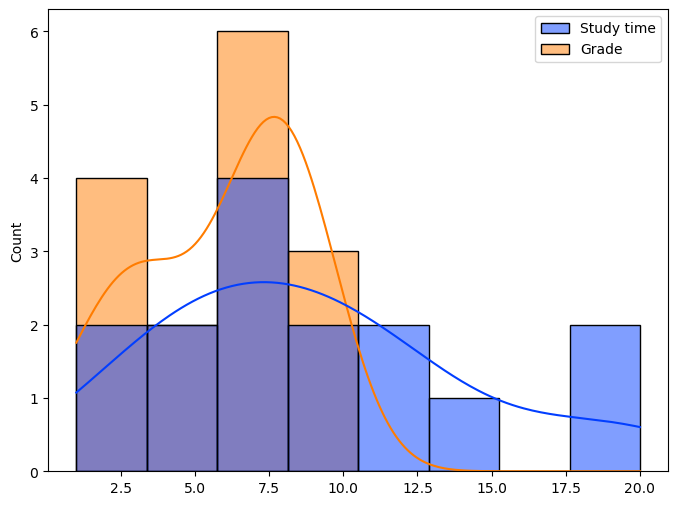

In [272]:
sns.histplot(df, bins=8, kde=True);

In [273]:
df.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [278]:
display(st.pearsonr(df["Study time"], df["Grade"])[0],
        st.spearmanr(df["Study time"], df["Grade"])[0])

0.7980456073578858

0.819658753036942

In [279]:
# yes, they have correlation

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

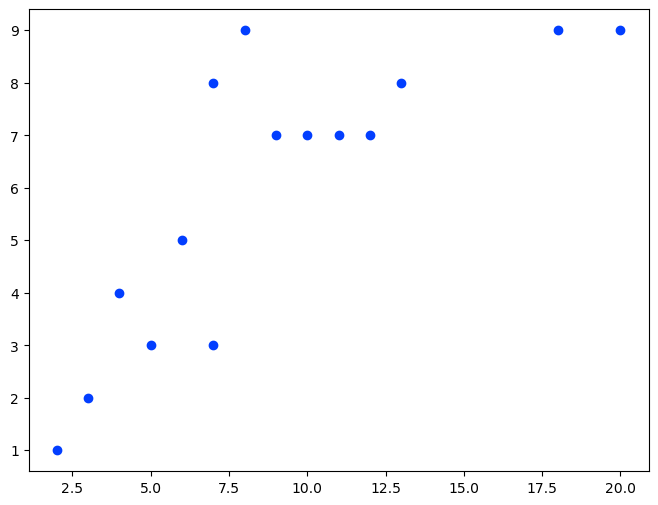

In [290]:
plt.scatter(x=df["Study time"], 
            y=df["Grade"])

In [291]:
# they have positive correlation indeed

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [294]:
print('''Pearson is parametric correlation measure to evaluate linear relationship.

On the other hand, spearman works better for non-parametric distributions as it evaluates 
monotonic relationship between two variables.
''')

Pearson is parametric correlation measure to evaluate linear relationship.

On the other hand, spearman works better for non-parametric distributions as it evaluates 
monotonic relationship between two variables.

